In [1]:
from gridenv import GridWorld3D
w = GridWorld3D(3, 5)

INFO:drake:Meshcat listening for connections at http://localhost:7003


done


In [2]:
import pickle
from pydrake.all import HPolyhedron
path = 'logs_3dgrid/experiment_grid3d_3_1_300_0.050_0.100/data/it_0.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)



regions = []
id_g = []
for ga, gb in zip(data['ra'],data['rb']):
    ids = []
    for a,b in zip(ga,gb):
        ids.append(len(regions))
        regions.append(HPolyhedron(a,b)) 
    id_g.append(ids)


In [7]:
w.plot_regions(regions, opacity=0.8)

In [2]:
import pickle
from pydrake.all import HPolyhedron
path = 'logs_3dgrid/experiment_grid3d_3_1_1_0.050_0.100/data/it_26.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)



regions = []
id_g = []
for ga, gb in zip(data['ra'],data['rb']):
    ids = []
    for a,b in zip(ga,gb):
        ids.append(len(regions))
        regions.append(HPolyhedron(a,b)) 
    id_g.append(ids)

In [5]:
w.plot_regions(regions, opacity=0.8)

In [15]:
import os
import glob
import pickle
import numpy as np
logs_directory = 'logs_3dgrid'

# Get a list of all subdirectories in the logs directory
experiment_directories = [directory for directory in glob.glob(os.path.join(logs_directory, '*')) if os.path.isdir(directory)]

# Define a dictionary to store the grouped experiments
grouped_experiments = {}

# Iterate over each experiment directory
for experiment_directory in experiment_directories:
    # Parse the experiment name
    experiment_name = os.path.basename(experiment_directory)
    name_parts = experiment_name.split('_')
    
    # Extract the relevant values from the experiment name
    b = int(name_parts[-5])
    N = int(name_parts[-3])
    
    # Get the last pickle file in the 'data' subdirectory
    data_directory = os.path.join(experiment_directory, 'data')
    pickle_files = glob.glob(os.path.join(data_directory, '*.pkl'))
    pkl_files = os.listdir(data_directory)
    pkl_idx = np.argsort([int(s.replace('it_', '').replace('.pkl', '')) for s in pkl_files])
    
    #pickle_files.sort()
    
    last_pickle_file = data_directory+'/'+pkl_files[pkl_idx[-1]]#pickle_files[-1]#max(pickle_files, key=os.path.getctime)
    
    # Load the last pickle file
    with open(last_pickle_file, 'rb') as file:
        data = pickle.load(file)
    
    # Find the 'summar' subdirectory and get the path to the text file
    summar_directory = os.path.join(experiment_directory, 'summary')
    text_files = glob.glob(os.path.join(summar_directory, '*.txt'))
    last_text_file = max(text_files, key=os.path.getctime)
    
    # Read the last line of the text file to extract coverage
    with open(last_text_file, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        coverage = float(last_line.split()[1])

    # Group experiments by 'b' value
    if b not in grouped_experiments:
        grouped_experiments[b] = {}
    
    # Group experiments by 'N' value
    if N not in grouped_experiments[b]:
        grouped_experiments[b][N] = []
    
    # Add the experiment data to the grouped experiments dictionary
    grouped_experiments[b][N].append([
            np.sum(len(g) for g in data['rb']), coverage , data['ttotal']])

# Print the grouped experiments
for b, experiments in grouped_experiments.items():
    print(f"Experiments with b = {b}:")
    for N, experiment_data in experiments.items():
        print(f"  Experiments with N = {N}:")
        for data in experiment_data:
            print(f"    Experiment data: {data}")

Experiments with b = 7:
  Experiments with N = 300:
    Experiment data: [24, 0.923, 346.04568243026733]
    Experiment data: [23, 0.914, 351.2694516181946]
    Experiment data: [23, 0.925, 346.08105301856995]
    Experiment data: [24, 0.942, 344.4764897823334]
    Experiment data: [24, 0.936, 343.1282515525818]
  Experiments with N = 1:
    Experiment data: [161, 0.804, 2777.172391653061]
    Experiment data: [203, 0.859, 3338.5422604084015]
    Experiment data: [258, 0.863, 4760.823438405991]
    Experiment data: [111, 0.76, 1846.6173932552338]
    Experiment data: [181, 0.867, 2892.3099660873413]
  Experiments with N = 30:
    Experiment data: [229, 0.889, 763.2387807369232]
    Experiment data: [186, 0.88, 642.0902619361877]
    Experiment data: [155, 0.873, 523.3858897686005]
    Experiment data: [164, 0.868, 554.8379623889923]
    Experiment data: [192, 0.889, 642.2506091594696]
Experiments with b = 11:
  Experiments with N = 300:
    Experiment data: [33, 0.904, 1231.49864912033

<ipython-input-15-66915638cbc5>:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(len(g) for g in data['rb']), coverage , data['ttotal']])


In [16]:
box_counts = [3,5,7]
minimum_covers = [(b+1)*3 for b in box_counts]
labels = ["N=1", "N=30", "N=300"]
fields = ['Number of Regions', 'Coverage', 'Time']
N_vals = [1,30,300]

data_1_mean = []
data_30_mean = []
data_300_mean = []
dm = [data_1_mean, data_30_mean, data_300_mean]

data_1_std = []
data_30_std = []
data_300_std = []
ds = [data_1_std, data_30_std, data_300_std]


for b in box_counts:
    exps = grouped_experiments[b]
    for N_exp in N_vals:
        runs = exps[N_exp]
        run_mean = np.mean(np.array(runs), axis = 0)
        run_std = np.std(np.array(runs), axis = 0)
        dm[N_vals.index(N_exp)].append(run_mean.tolist())
        ds[N_vals.index(N_exp)].append(run_std.tolist())


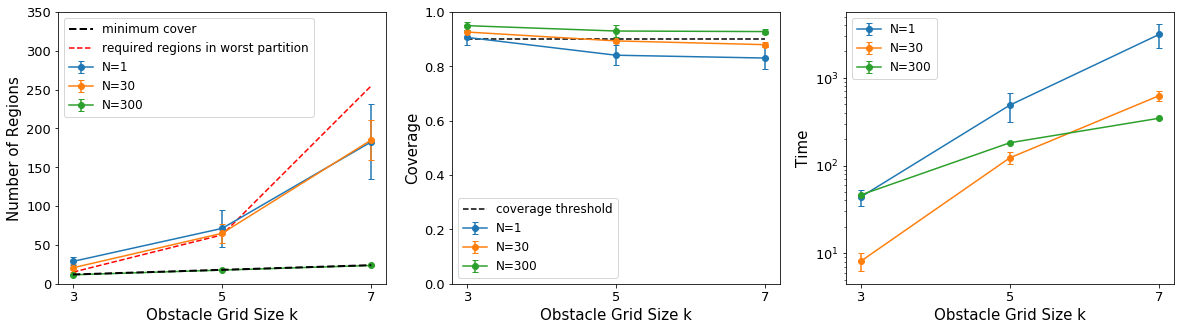

In [17]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

for field_id, ax in enumerate(axs):
    for approach_id, (mean_approach, std_approach) in enumerate(zip(dm, ds)):
        ax.errorbar(box_counts, np.array(mean_approach)[:, field_id], yerr=np.array(std_approach)[:, field_id], fmt='o-', capsize=3, label  = labels[approach_id])
        ax.set_xlabel('Obstacle Grid Size k',fontsize =15)
        ax.set_ylabel(fields[field_id], fontsize =15)
        ax.set_xticks(box_counts)
        
    if field_id ==2:
        ax.semilogy()
    if field_id ==1:
        ax.set_ylim([0,1])
        ax.plot([box_counts[0], box_counts[-1]], [0.9,0.9], linestyle='--', c = 'k', label = 'coverage threshold')
    if field_id == 0:
        #ax.semilogy()
        ax.set_ylim([0,350])
        ax.plot(box_counts, minimum_covers, linestyle = 'dashed', c = 'k', linewidth= 2, label ='minimum cover', zorder = 8)
        ax.plot(box_counts, [2**(k+1)-1 for k in box_counts], linestyle = 'dashed', c = 'r', label ='required regions in worst partition')
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.legend(fontsize = 12)
plt.savefig('3d_grid_comparison.pdf')